Practice ANN. Styled after Book Example in Ch 10-ageron

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full.dtype

dtype('uint8')

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_valid, X_train= X_train_full[ : 5000]/255, X_train_full [5000 :]/255

In [ ]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_valid[1:5]

array([0, 0, 3, 0], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

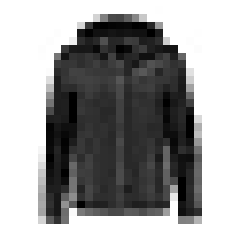

In [ ]:
plt.imshow (X_train[0], cmap = 'binary' )
plt.axis ('off')
plt.show ()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names [y_train[1]]

'T-shirt/top'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
import numpy as np

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


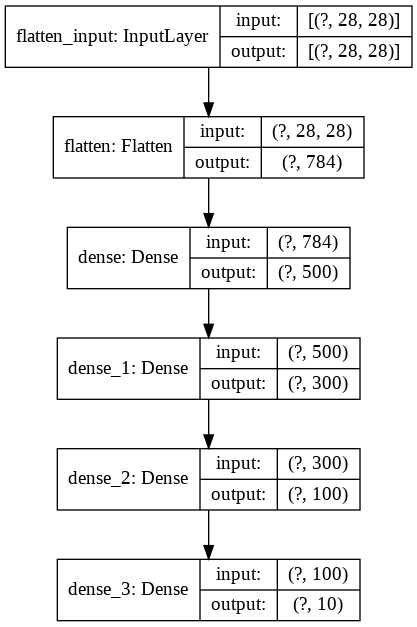

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
# This is the first hidden layer with 300 neurons

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.06737114,  0.04700039, -0.00767122, ..., -0.00064621,
        -0.06209258,  0.04953512],
       [ 0.04446535, -0.03414544,  0.06501105, ...,  0.04694042,
        -0.01599661, -0.02522098],
       [ 0.03151222,  0.06432592, -0.06751716, ...,  0.01259398,
        -0.05260153,  0.06580117],
       ...,
       [ 0.04183064, -0.06134846,  0.04475776, ...,  0.02215719,
        -0.03790555,  0.04887236],
       [ 0.01662873, -0.05984879,  0.00515139, ...,  0.00569001,
        -0.02609448, -0.05343509],
       [ 0.035156  ,  0.03343154, -0.05177553, ...,  0.04042663,
         0.0454046 , -0.01004991]], dtype=float32)

In [ ]:
weights.shape

(784, 500)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(500,)

In [ ]:
y_valid
# Here y_valid is not onehot encoded. Hence sparse categorical cross entropy is used.

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [ ]:
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4880 - accuracy: 0.8216 - val_loss: 0.3761 - val_accuracy: 0.8576
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8652 - val_loss: 0.3974 - val_accuracy: 0.8564
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.8764 - val_loss: 0.3175 - val_accuracy: 0.8816
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8867 - val_loss: 0.3140 - val_accuracy: 0.8864
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2878 - accuracy: 0.8926 - val_loss: 0.3059 - val_accuracy: 0.8856
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.8984 - val_loss: 0.3167 - val_accuracy: 0.8892
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9018 - val_loss: 0.3127 - val_accuracy:

In [ ]:

model.save('/content/drive/My Drive/Colab Notebooks/Teaching/Lab 5/Practice ANN_fashion-minst-1.h5')

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import pandas as pd
import os

from pylab import savefig
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/content/drive/My Drive/Colab Notebooks/Teaching/Lab 5', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure keras_learning_curves_plot-1


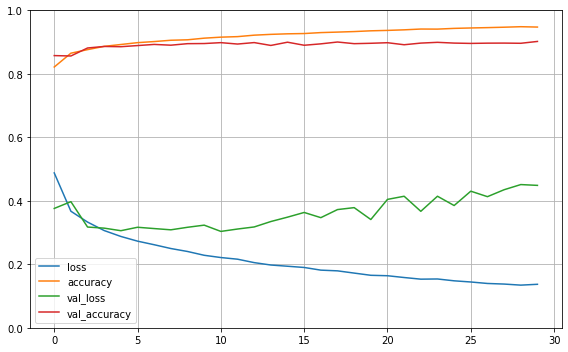

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot-1")
plt.show()

In [ ]:
# Save model


Now include regularization

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
y_pred1 = np.argmax(model.predict(X_new), axis=-1)

In [ ]:
y_pred1

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [ ]:
from keras.models import load_model

model_fashion_minst1 = load_model('/content/drive/My Drive/Colab Notebooks/Teaching/Lab 5/Practice ANN_fashion-minst.h5')
model_fashion_minst1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
